# Credit Card Fraud Detection Project

This project focuses on building and evaluating machine learning models to detect fraudulent credit card transactions.

## Project Steps:

1.  **Data Loading and Exploration**:
    *   Loaded the credit card transaction data from a CSV file.
    *   Handled missing values by dropping rows with nulls.
    *   Explored the dataset shape, descriptive statistics, and null values.
    *   Analyzed the distribution of fraudulent vs. non-fraudulent transactions.

2.  **Exploratory Data Analysis**:
    *   Visualized the relationship between `ratio_to_median_purchase_price`, `distance_from_home`, and `fraud`.
    *   Created a bar plot to show the count of fraudulent and non-fraudulent transactions.
    *   Calculated and printed the percentage of fraudulent and non-fraudulent records.
    *   Displayed the data types of the columns.
    *   Generated a heatmap to visualize the correlation matrix between features.

3.  **Feature Selection and Splitting**:
    *   Separated the features (X) and the target variable (y - fraud).
    *   Split the data into training and testing sets using `train_test_split`.

4.  **Feature Scaling**:
    *   Applied `StandardScaler` to standardize the features in the training and testing sets.

5.  **Handling Class Imbalance**:
    *   Used `SMOTETomek` to address the class imbalance in the training data by oversampling the minority class (fraud) and undersampling the majority class (non-fraud).

6.  **Model Training and Evaluation**:
    *   Trained and evaluated three classification models:
        *   **Logistic Regression**: Trained the model and made predictions on the test set. Evaluated using confusion matrix, classification report, accuracy, precision, recall, and F1-score.
        *   **Decision Tree Classifier**: Trained a Decision Tree model with a maximum depth of 4 and made predictions on the test set. Evaluated using confusion matrix, accuracy, precision, recall, and F1-score.
        *   **K-Nearest Neighbors (KNN)**: Trained a KNN model with `n_neighbors=7` and made predictions on the test set. Evaluated using confusion matrix, accuracy, precision, recall, and F1-score.

7.  **Model Saving**:
    *   Saved the trained Logistic Regression, Decision Tree, and KNN models using `pickle`.

## Models Trained:

*   Logistic Regression
*   Decision Tree Classifier
*   K-Nearest Neighbors (KNN)

## Evaluation Metrics:

The models were evaluated using the following metrics:

*   Accuracy
*   Precision
*   Recall
*   F1-score
*   Confusion Matrix
*   Classification Report (for Logistic Regression)

## Files:

*   `card_transdata.csv`: The dataset used for training and evaluation.
*   `model_lr.pkl`: Saved Logistic Regression model.
*   `Model_dt.pkl`: Saved Decision Tree Classifier model.
*   `model_knn.pkl`: Saved KNN model.

importing libraries


In [24]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [25]:
raw_data = pd.read_csv("/content/card_transdata.csv")
raw_data.dropna(inplace=True)

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
raw_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [28]:
raw_data.shape

(1000000, 8)

Exploratory data analysis



In [29]:
raw_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
raw_data.isnull().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [31]:
fraud_counts =raw_data["fraud"].value_counts()

<Axes: xlabel='ratio_to_median_purchase_price', ylabel='distance_from_home'>

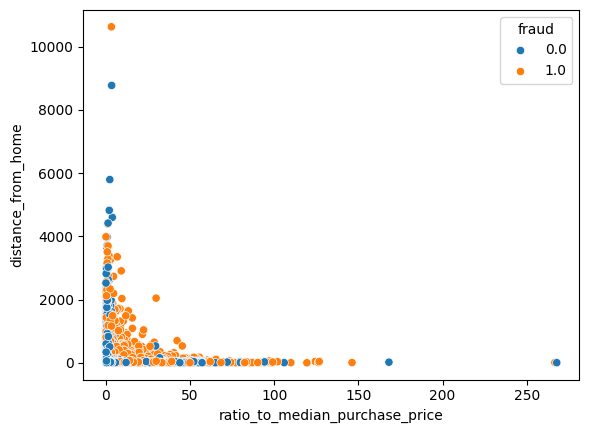

In [32]:
sns.scatterplot(x='ratio_to_median_purchase_price',y='distance_from_home',hue='fraud',data=raw_data)

/tmp/ipython-input-3965936377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["blue", "red"])


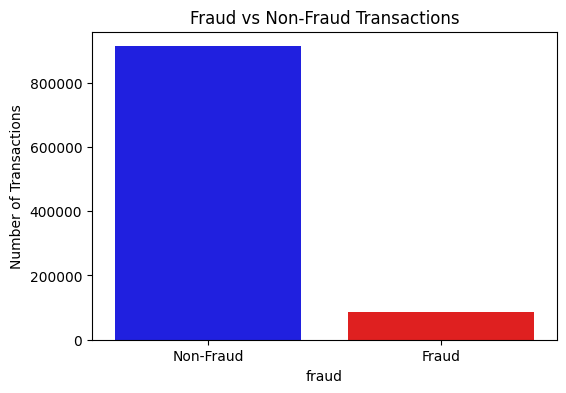

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])
plt.ylabel("Number of Transactions")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

In [34]:
print("The fraud record",(87403/1000000)*100,"%")
print("The non-fraud record",(912597/1000000)*100,"%")

The fraud record 8.7403 %
The non-fraud record 91.2597 %


In [35]:
fraud=raw_data["fraud"]

In [36]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


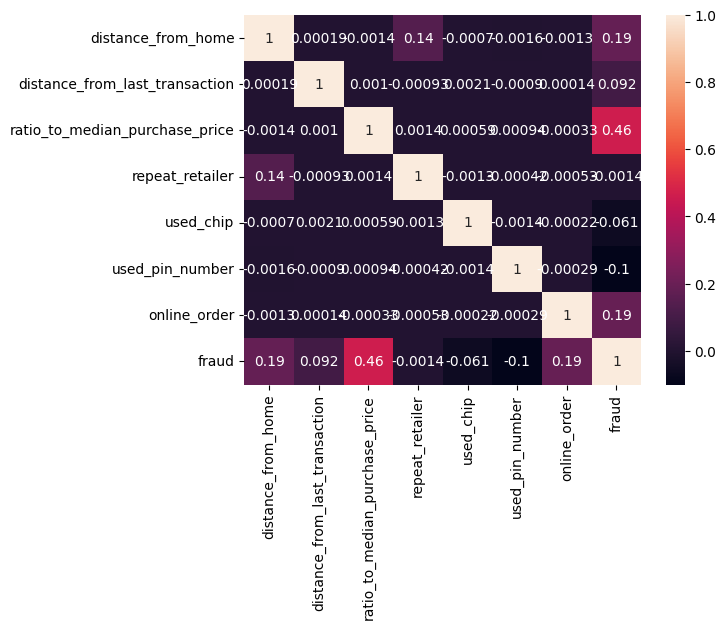

In [37]:
corr=raw_data.corr()
sns.heatmap(corr,annot=True)
corr

feature selection and splitting

In [38]:
x=raw_data.drop(['fraud'],axis=1)
y=raw_data.fraud
x.shape

(1000000, 7)

In [39]:
x_train,x_test,y_train, y_test=train_test_split(x,y, train_size=0.7, random_state=44)
x_train.shape

(700000, 7)

In [40]:
x_test.shape

(300000, 7)

Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

SMOTE+Tomek after spliting to overcome data leakage

In [42]:
from imblearn.combine import SMOTETomek
Smotetomek=SMOTETomek()
x_train, y_train = Smotetomek.fit_resample(x_train,y_train)

In [43]:
x_train.shape

(1277650, 7)

In [44]:
y_train.shape

(1277650,)

In [45]:
fraud_counts =y_train.value_counts()
fraud_counts

,count
fraud,
0.0,638825
1.0,638825


/tmp/ipython-input-3965936377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["blue", "red"])


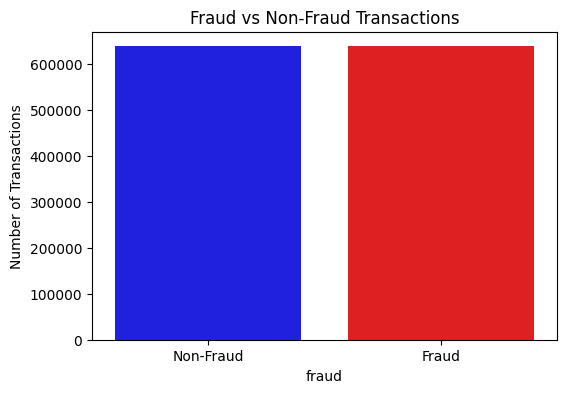

In [46]:
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])
plt.ylabel("Number of Transactions")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

Training and evaluation of Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr=lr.fit(x_train,y_train)
model_lr

LogisticRegression()

In [48]:
y_pred=model_lr.predict(x_test)

In [49]:
print(y_pred)

[0. 1. 1. ... 0. 0. 0.]


In [50]:
y_test


,fraud
582910,0.0
316332,1.0
468675,0.0
966473,0.0
390422,0.0
...,...
576749,0.0
111667,1.0
813982,0.0
399792,0.0


In [51]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

cf=confusion_matrix(y_pred, y_test)
accuracy_lr=accuracy_score(y_pred, y_test)
precision_lr=precision_score(y_pred,y_test)
recall_lr=recall_score(y_pred,y_test)
f1_lr=f1_score(y_pred,y_test)

cf

array([[255256,   1283],
       [ 18503,  24958]])

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273759
         1.0       0.57      0.95      0.72     26241

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



In [53]:
print("Accuracy of logistic regression",accuracy_lr)
print("precison of logistic regression",precision_lr)
print("recall of logistic regression",recall_lr)
print("F1 measure of logistic regression",f1_lr)



Accuracy of logistic regression 0.9340466666666667
precison of logistic regression 0.9511070462253725
recall of logistic regression 0.5742619820068567
F1 measure of logistic regression 0.7161344007345557


Training and evaluation of Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=4)
model_dt=model.fit(x_train,y_train)
model_dt

DecisionTreeClassifier(max_depth=4)

In [55]:
y_pred_dt=model_dt.predict(x_test)
y_pred_dt

array([0., 1., 0., ..., 0., 0., 0.])

In [56]:
print(y_test)

582910    0.0
316332    1.0
468675    0.0
966473    0.0
390422    0.0
         ... 
576749    0.0
111667    1.0
813982    0.0
399792    0.0
401587    0.0
Name: fraud, Length: 300000, dtype: float64


In [57]:
confusion_matrix(y_pred_dt,y_test)


array([[272081,    202],
       [  1678,  26039]])

In [58]:
accuracy_dt=accuracy_score(y_pred_dt,y_test)
precision_dt=precision_score(y_pred_dt,y_test)
recall_dt=recall_score(y_pred_dt,y_test)
f1_dt=f1_score(y_pred_dt,y_test)

print("Accuracy of Decison Tree classifier",accuracy_dt)
print("precison of Decison Tree classifier",precision_dt)
print("recall of Decison Tree classifier",recall_dt)
print("f1 measure of Decison Tree classifier",f1_dt)

Accuracy of Decison Tree classifier 0.9937333333333334
precison of Decison Tree classifier 0.9923021226325216
recall of Decison Tree classifier 0.9394595374679799
f1 measure of Decison Tree classifier 0.9651580859186775


Training and evaluation of KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model_knn=model.fit(x_train,y_train)

In [60]:
y_pred_knn=model_knn.predict(x_test)

In [61]:
confusion_matrix(y_pred_knn,y_test)

array([[273179,     28],
       [   580,  26213]])

In [62]:
accuracy_knn=accuracy_score(y_pred_knn,y_test)
precision_knn=precision_score(y_pred_knn,y_test)
recall_knn=recall_score(y_pred_knn,y_test)
f1_knn=f1_score(y_pred_knn,y_test)

print("Accuracy of KNeighbors Classifier",accuracy_knn)
print("precison of KNeighbors Classifier",precision_knn)
print("recall of KNeighbors Classifier",recall_knn)
print("f1 measure of KNeighbors Classifier",f1_knn)



Accuracy of KNeighbors Classifier 0.9979733333333334
precison of KNeighbors Classifier 0.9989329674936168
recall of KNeighbors Classifier 0.9783525547717687
f1 measure of KNeighbors Classifier 0.9885356563713844


In [63]:
import pickle

with open("model_lr.pkl", "wb") as model_file:
    pickle.dump(model_lr, model_file)
print("Logistic regression Model saved as model_lr.pkl")


Logistic regression Model saved as model_lr.pkl


In [64]:
with open("Model_dt.pkl", "wb") as model_file:
    pickle.dump(model_dt, model_file)
print("DecisionTree Model saved as Model_dt.pkl")

DecisionTree Model saved as Model_dt.pkl


In [65]:
with open("model_knn.pkl", "wb") as model_file:
    pickle.dump(model_knn, model_file)
print("KNN is saved as model_knn.pkl")

KNN is saved as model_knn.pkl
